<a href="https://colab.research.google.com/github/MinabutdinovAlmaz/MlPython/blob/main/minabutdinovaa_4405_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ЗАПУСКАТЬ ЛУЧШЕ НА GPU. Быстрее обучается и лучше генерируется шум.**

При запуске на CPU плохо генерируется шум и чаще обучение проваливается в локальный минимум.

**Генеративно-состязательные сети - простой GAN (полносвязный)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [ ]:
# Константы
BATCH_SIZE = 128
LATENT_DIM = 100
IMAGE_SIZE = 28 * 28
LEARNING_RATE = 0.0002
EPOCHS = 50
NUM_IMAGES_TO_DISPLAY = 10

In [ ]:
# Загрузка данных MNIST
def load_mnist_data():
    (x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_train = (x_train - 0.5) / 0.5  # Нормализуем в диапазон [-1, 1]
    x_train = x_train.reshape(-1, IMAGE_SIZE)  # Flatten
    dataset = tf.data.Dataset.from_tensor_slices(x_train)
    dataset = dataset.shuffle(buffer_size=60000).batch(BATCH_SIZE)
    return dataset, x_train

dataset, x_train = load_mnist_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
# Определение генератора (G)
def build_generator():
    model = models.Sequential([
        layers.Dense(256, input_shape=(LATENT_DIM,)),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(1024),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(IMAGE_SIZE, activation='tanh')
    ])
    return model

In [ ]:
# Определение дискриминатора (D)
def build_discriminator():
    model = models.Sequential([
        layers.Dense(1024, input_shape=(IMAGE_SIZE,)),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
# Создание моделей и оптимизаторов
generator = build_generator()
discriminator = build_discriminator()

g_optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)
d_optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)

loss_fn = tf.keras.losses.BinaryCrossentropy()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
#Создаем вектор со случайным распределением размерностью (1, LATENT_DIM), его мы будем подавать на вход генератора:
noise_g = tf.random.normal(shape=(1,LATENT_DIM))  #  new noise for generator

In [ ]:
#Посмотрим как выглядит наш вектор:
plt.figure(figsize=(10,5))     # задаем размер фигуры
plt.imshow(noise_g, cmap='gray') # параметры вывода картинки
plt.axis('off')                # отключаем оси
plt.show()                     # выводим изображение

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step


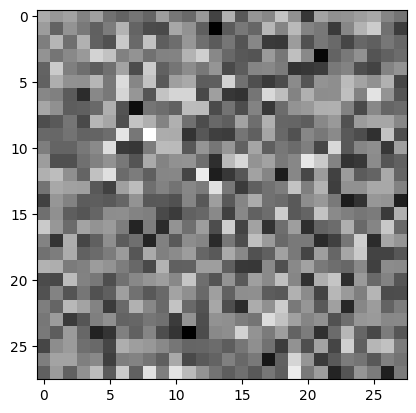

In [ ]:
#Посмотрим как работает наш необученный генератор
predict_gen = generator.predict(noise_g)

plt.imshow(predict_gen[0].reshape(28, 28), cmap='gray')
plt.show()

In [ ]:
#Посмотрим как работает наш дискриминатор, подадим на его вход 10 изображений
#из набора Mnist и 10 сгенерированных с помощью генератора изображений
print('Дискриминатор на изображениях MNIST: ')
for i in range(10):
  predict_dis = discriminator.predict(x_train[i][None, ...])
  print(predict_dis)
print('Дискриминатор на сгенерированных изображениях: ')
for i in range(10):
  noise = np.random.normal(size=(1,LATENT_DIM)) # Каждый раз на вход приходит новый вектор
  predict_gen = generator.predict(noise)
  predict_dis = discriminator.predict(predict_gen)
  print(predict_dis)

Дискриминатор на изображениях MNIST: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
[[0.57322454]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.6806883]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.59004694]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.6578512]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.6137272]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.6447577]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.532726]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.6067142]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.61235774]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.66038644]]
Дискриминатор на сгенерированных изображениях: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.50594074]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.5030611]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.5339674]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.520563]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28

In [ ]:
# Обучение GAN
def train_step(real_images):
    batch_size = tf.shape(real_images)[0]

    # Обучение дискриминатора
    noise_d = tf.random.normal([batch_size, LATENT_DIM]) # noise for discriminator
    with tf.GradientTape() as d_tape:
        fake_images = generator(noise_d, training = True)  # added training = True
        real_output = discriminator(real_images, training = True) # added training = True
        fake_output = discriminator(fake_images, training = True) # added training = True
        d_real_loss = loss_fn(tf.ones_like(real_output), real_output)
        d_fake_loss = loss_fn(tf.zeros_like(fake_output), fake_output)
        d_loss = d_real_loss + d_fake_loss
    d_gradients = d_tape.gradient(d_loss, discriminator.trainable_variables)
    d_optimizer.apply_gradients(zip(d_gradients, discriminator.trainable_variables))

    # Обучение генератора
    noise_g = tf.random.normal([batch_size, LATENT_DIM])  #  new noise for generator
    with tf.GradientTape() as g_tape:
        fake_images = generator(noise_g, training = True) # added training = True
        fake_output = discriminator(fake_images, training = True) # added training = True
        g_loss = loss_fn(tf.ones_like(fake_output), fake_output)
    g_gradients = g_tape.gradient(g_loss, generator.trainable_variables)
    g_optimizer.apply_gradients(zip(g_gradients, generator.trainable_variables))


    return d_loss, g_loss

In [ ]:
def train_gan(dataset):
    for epoch in range(EPOCHS):
        for i, real_images in enumerate(dataset):
            d_loss, g_loss = train_step(real_images)
            if (i+1) % 200 == 0:
                print(f"Epoch: [{epoch+1}/{EPOCHS}], Batch: [{i+1}/{len(dataset)}], D loss: {d_loss:.4f}, G loss: {g_loss:.4f}")

        if (epoch+1) % 10 == 0:
             # Display generated images every 10 epochs
             display_generated_images(NUM_IMAGES_TO_DISPLAY, f"Generated images after epoch {epoch+1}")

In [ ]:
# Генерация и отображение новых изображений
def display_generated_images(num_images, title="Generated Images"):
    noise = tf.random.normal([num_images, LATENT_DIM])
    generated_images = generator(noise, training = False) # added training = False
    generated_images = tf.reshape(generated_images, [num_images, 28, 28]).numpy()

    plt.figure(figsize=(10, 10))
    for i, image in enumerate(generated_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

Epoch: [1/50], Batch: [200/469], D loss: 0.0687, G loss: 7.1386
Epoch: [1/50], Batch: [400/469], D loss: 0.0816, G loss: 11.0768
Epoch: [2/50], Batch: [200/469], D loss: 0.3594, G loss: 5.2512
Epoch: [2/50], Batch: [400/469], D loss: 0.6152, G loss: 3.4231
Epoch: [3/50], Batch: [200/469], D loss: 0.6751, G loss: 3.3365
Epoch: [3/50], Batch: [400/469], D loss: 0.6115, G loss: 1.9096
Epoch: [4/50], Batch: [200/469], D loss: 1.0926, G loss: 2.2658
Epoch: [4/50], Batch: [400/469], D loss: 0.8563, G loss: 1.3606
Epoch: [5/50], Batch: [200/469], D loss: 0.9467, G loss: 1.8108
Epoch: [5/50], Batch: [400/469], D loss: 1.0811, G loss: 1.3506
Epoch: [6/50], Batch: [200/469], D loss: 1.0278, G loss: 2.6584
Epoch: [6/50], Batch: [400/469], D loss: 0.9140, G loss: 1.5872
Epoch: [7/50], Batch: [200/469], D loss: 0.8346, G loss: 1.7974
Epoch: [7/50], Batch: [400/469], D loss: 1.1130, G loss: 2.0802
Epoch: [8/50], Batch: [200/469], D loss: 1.0555, G loss: 1.6391
Epoch: [8/50], Batch: [400/469], D loss

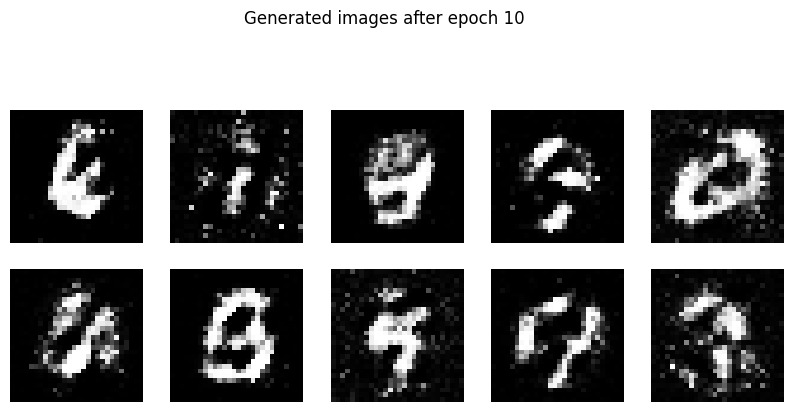

Epoch: [11/50], Batch: [200/469], D loss: 1.1084, G loss: 1.3341
Epoch: [11/50], Batch: [400/469], D loss: 1.3051, G loss: 0.9960
Epoch: [12/50], Batch: [200/469], D loss: 1.0971, G loss: 1.6012
Epoch: [12/50], Batch: [400/469], D loss: 1.0984, G loss: 1.3996
Epoch: [13/50], Batch: [200/469], D loss: 0.9435, G loss: 3.0506
Epoch: [13/50], Batch: [400/469], D loss: 1.1475, G loss: 1.3396
Epoch: [14/50], Batch: [200/469], D loss: 0.9605, G loss: 1.5991
Epoch: [14/50], Batch: [400/469], D loss: 1.0700, G loss: 1.5116
Epoch: [15/50], Batch: [200/469], D loss: 0.7515, G loss: 1.7365
Epoch: [15/50], Batch: [400/469], D loss: 0.9613, G loss: 1.5198
Epoch: [16/50], Batch: [200/469], D loss: 0.9668, G loss: 1.3087
Epoch: [16/50], Batch: [400/469], D loss: 1.1135, G loss: 1.4148
Epoch: [17/50], Batch: [200/469], D loss: 1.0811, G loss: 0.9669
Epoch: [17/50], Batch: [400/469], D loss: 1.2589, G loss: 0.7857
Epoch: [18/50], Batch: [200/469], D loss: 1.1179, G loss: 1.1012
Epoch: [18/50], Batch: [4

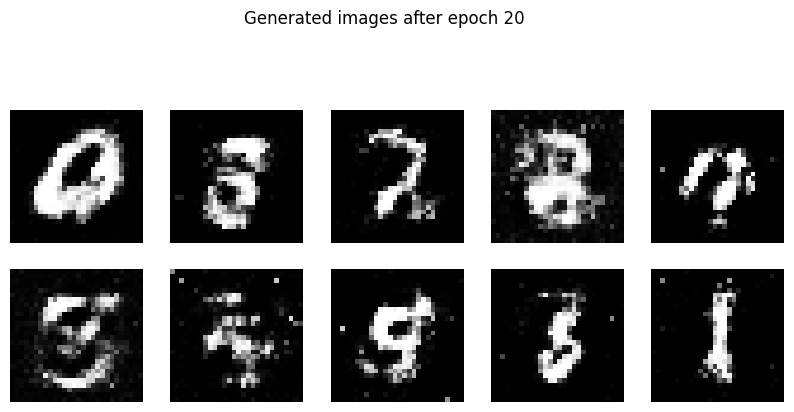

Epoch: [21/50], Batch: [200/469], D loss: 1.3011, G loss: 0.8868
Epoch: [21/50], Batch: [400/469], D loss: 1.2533, G loss: 0.9282
Epoch: [22/50], Batch: [200/469], D loss: 1.3506, G loss: 0.8277
Epoch: [22/50], Batch: [400/469], D loss: 1.1854, G loss: 1.2001
Epoch: [23/50], Batch: [200/469], D loss: 1.2521, G loss: 1.3713
Epoch: [23/50], Batch: [400/469], D loss: 1.2939, G loss: 0.9063
Epoch: [24/50], Batch: [200/469], D loss: 1.3217, G loss: 0.9493
Epoch: [24/50], Batch: [400/469], D loss: 1.1590, G loss: 0.9013
Epoch: [25/50], Batch: [200/469], D loss: 1.2281, G loss: 1.0259
Epoch: [25/50], Batch: [400/469], D loss: 1.3693, G loss: 0.8061
Epoch: [26/50], Batch: [200/469], D loss: 0.9565, G loss: 1.2051
Epoch: [26/50], Batch: [400/469], D loss: 1.1556, G loss: 1.4819
Epoch: [27/50], Batch: [200/469], D loss: 1.1697, G loss: 0.9022
Epoch: [27/50], Batch: [400/469], D loss: 1.1645, G loss: 1.1493
Epoch: [28/50], Batch: [200/469], D loss: 1.2141, G loss: 0.9767
Epoch: [28/50], Batch: [4

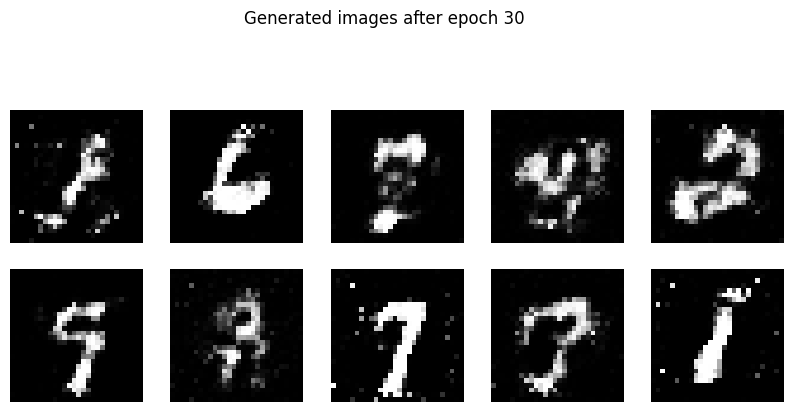

Epoch: [31/50], Batch: [200/469], D loss: 1.1732, G loss: 1.0507
Epoch: [31/50], Batch: [400/469], D loss: 1.3504, G loss: 0.9623
Epoch: [32/50], Batch: [200/469], D loss: 1.2626, G loss: 0.9276
Epoch: [32/50], Batch: [400/469], D loss: 1.3964, G loss: 0.7693
Epoch: [33/50], Batch: [200/469], D loss: 1.2404, G loss: 0.9184
Epoch: [33/50], Batch: [400/469], D loss: 1.1524, G loss: 0.9488
Epoch: [34/50], Batch: [200/469], D loss: 1.2876, G loss: 0.9272
Epoch: [34/50], Batch: [400/469], D loss: 1.2707, G loss: 1.1622
Epoch: [35/50], Batch: [200/469], D loss: 1.1702, G loss: 0.9418
Epoch: [35/50], Batch: [400/469], D loss: 1.3587, G loss: 1.2057
Epoch: [36/50], Batch: [200/469], D loss: 1.3528, G loss: 0.8467
Epoch: [36/50], Batch: [400/469], D loss: 1.2314, G loss: 1.1302
Epoch: [37/50], Batch: [200/469], D loss: 1.1847, G loss: 1.0155
Epoch: [37/50], Batch: [400/469], D loss: 1.3458, G loss: 0.7903
Epoch: [38/50], Batch: [200/469], D loss: 1.2622, G loss: 0.8745
Epoch: [38/50], Batch: [4

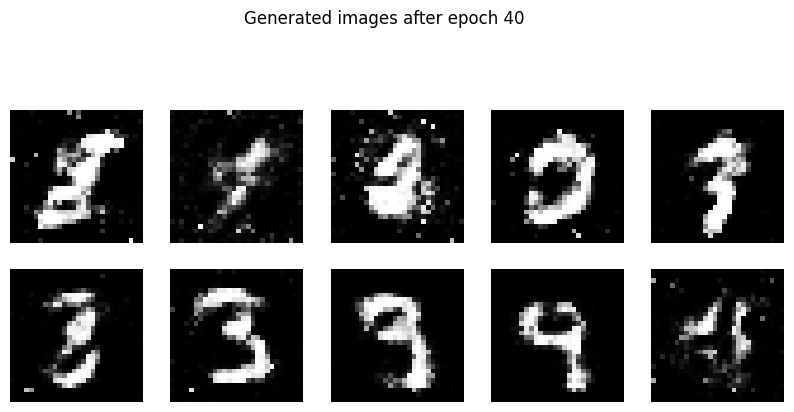

Epoch: [41/50], Batch: [200/469], D loss: 1.1839, G loss: 1.0296
Epoch: [41/50], Batch: [400/469], D loss: 1.3016, G loss: 0.8213
Epoch: [42/50], Batch: [200/469], D loss: 1.3085, G loss: 0.7973
Epoch: [42/50], Batch: [400/469], D loss: 1.3454, G loss: 0.8411
Epoch: [43/50], Batch: [200/469], D loss: 1.3560, G loss: 0.7166
Epoch: [43/50], Batch: [400/469], D loss: 1.1555, G loss: 0.9874
Epoch: [44/50], Batch: [200/469], D loss: 1.1747, G loss: 1.2048
Epoch: [44/50], Batch: [400/469], D loss: 1.1314, G loss: 1.0442
Epoch: [45/50], Batch: [200/469], D loss: 1.3067, G loss: 0.8405
Epoch: [45/50], Batch: [400/469], D loss: 1.3538, G loss: 0.8122
Epoch: [46/50], Batch: [200/469], D loss: 1.1640, G loss: 0.8640
Epoch: [46/50], Batch: [400/469], D loss: 1.3323, G loss: 0.7491
Epoch: [47/50], Batch: [200/469], D loss: 1.3043, G loss: 1.0920
Epoch: [47/50], Batch: [400/469], D loss: 1.3379, G loss: 0.8915
Epoch: [48/50], Batch: [200/469], D loss: 1.1695, G loss: 1.0269
Epoch: [48/50], Batch: [4

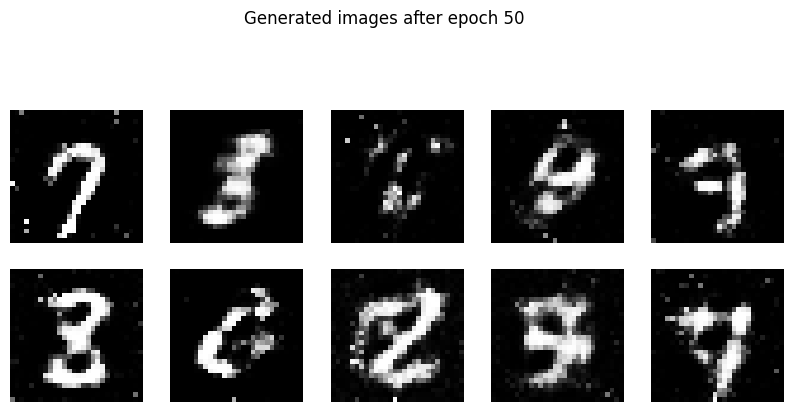

In [ ]:
# Обучение
train_gan(dataset)

In [ ]:
#display_generated_images(NUM_IMAGES_TO_DISPLAY, title="Final Generated Images")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


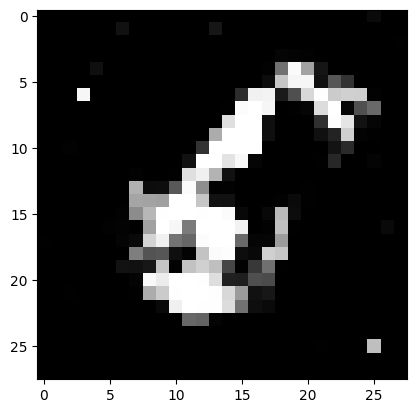

In [ ]:
#Посмотрим как работает наш ОБУЧЕННЫЙ генератор
noise_g = tf.random.normal(shape=(1,LATENT_DIM))  #  new noise for generator
predict_gen = generator.predict(noise_g)

plt.imshow(predict_gen[0].reshape(28, 28), cmap='gray')
plt.show()

**Генеративно-состязательные сети - сверточный GAN на датасете MNIST**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Гиперпараметры
img_width, img_height, img_channels = 28, 28, 1  # Размер изображения
latent_dim = 100  # Размерность латентного пространства (шум)
batch_size = 128
epochs = 20
learning_rate = 0.0002
beta_1 = 0.5  # Параметр для оптимизатора Adam

In [ ]:
# Загрузка и предобработка данных (MNIST - пример)
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Нормализация и изменение формы
x_train = x_train.astype('float32')
x_train = (x_train - 127.5) / 127.5  # Нормализация в диапазон [-1, 1]
x_train = x_train.reshape(x_train.shape[0], img_width, img_height, img_channels)

In [ ]:
# Создание tf.data.Dataset для эффективной подачи данных
buffer_size = x_train.shape[0]
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size).batch(batch_size)

In [ ]:
# Архитектура генератора
def build_generator():
    model = models.Sequential()

    # Начальный блок (Dense -> Reshape)
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, 256)))

    # Первый блок Conv2DTranspose
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Второй блок Conv2DTranspose
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Третий блок Conv2DTranspose
    model.add(layers.Conv2DTranspose(img_channels, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))  # tanh для выходных данных в диапазоне [-1, 1]

    return model

In [ ]:
# Архитектура дискриминатора
def build_discriminator():
    model = models.Sequential()

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                            input_shape=(img_width, img_height, img_channels)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
# Определение моделей
generator = build_generator()
discriminator = build_discriminator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Оптимизаторы
generator_optimizer = optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1)
discriminator_optimizer = optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1)

In [ ]:
# Функции потерь
cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [ ]:
"""
Вычисляет потери дискриминатора, стремясь распознать реальные
изображения как “реальные” (1) и сгенерированные изображения
как “фейковые” (0). Используется BinaryCrossentropy().
"""
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
"""Вычисляет потери генератора, стремясь заставить дискриминатор
классифицировать сгенерированные изображения как “реальные” (1).
Используется BinaryCrossentropy().
"""
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
# Функции для обучения
"""
Функция, выполняющая один шаг обучения:
Генерируется случайный шум.
Генерируются изображения с помощью генератора.
Получаются предсказания дискриминатора для реальных и сгенерированных изображений.
Вычисляются потери для генератора и дискриминатора.
Вычисляются градиенты потерь для каждого слоя.
Применяются градиенты для обновления весов генератора и дискриминатора.
"""
@tf.function  # Декоратор для повышения производительности
def train_step(images):
    noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss

In [ ]:
# Функция, выполняющая обучение в течение нескольких эпох
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
        print(f"Epoch {epoch+1}, gen loss: {gen_loss}, disc loss: {disc_loss}")

        # Генерация и сохранение примеров изображений каждые несколько эпох (для мониторинга)
        if (epoch + 1) % 5 == 0:
            generate_and_save_images(generator,
                                     epoch + 1,
                                     tf.random.normal([16, latent_dim])) # 16 примеров

In [ ]:
# Генерация и сохранение изображений
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 0.5 + 0.5, cmap='gray') # Денормализация [-1, 1] -> [0, 1]
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

Epoch 1, gen loss: 0.8372500538825989, disc loss: 1.2668534517288208
Epoch 2, gen loss: 0.7421993017196655, disc loss: 1.3280045986175537
Epoch 3, gen loss: 0.7985849380493164, disc loss: 1.3389883041381836
Epoch 4, gen loss: 0.9152387380599976, disc loss: 1.2527821063995361
Epoch 5, gen loss: 0.6854104995727539, disc loss: 1.395167589187622


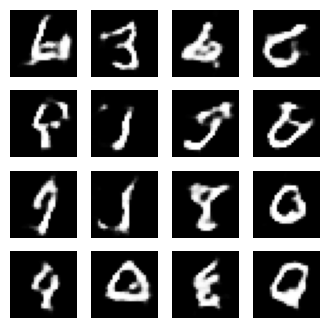

Epoch 6, gen loss: 1.1573607921600342, disc loss: 1.2479093074798584
Epoch 7, gen loss: 0.7288774251937866, disc loss: 1.261776328086853
Epoch 8, gen loss: 0.6553493142127991, disc loss: 1.3324097394943237
Epoch 9, gen loss: 0.7488559484481812, disc loss: 1.4945838451385498
Epoch 10, gen loss: 0.8014737367630005, disc loss: 1.2765047550201416


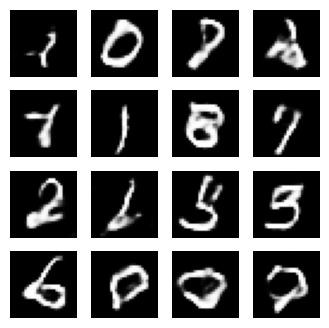

Epoch 11, gen loss: 0.9672306776046753, disc loss: 1.236682653427124
Epoch 12, gen loss: 0.8159021735191345, disc loss: 1.387878656387329
Epoch 13, gen loss: 0.6832130551338196, disc loss: 1.3295717239379883
Epoch 14, gen loss: 0.7937016487121582, disc loss: 1.3152426481246948
Epoch 15, gen loss: 1.0014276504516602, disc loss: 1.2711491584777832


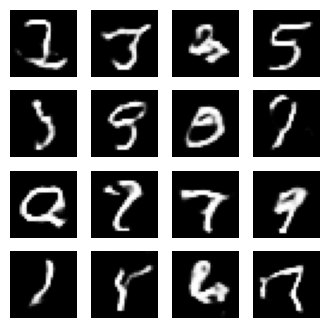

Epoch 16, gen loss: 1.0125842094421387, disc loss: 1.2973766326904297
Epoch 17, gen loss: 0.9942303895950317, disc loss: 1.345329999923706
Epoch 18, gen loss: 0.7815923690795898, disc loss: 1.2940424680709839
Epoch 19, gen loss: 0.6627997159957886, disc loss: 1.3254806995391846
Epoch 20, gen loss: 0.9999979734420776, disc loss: 1.2622729539871216


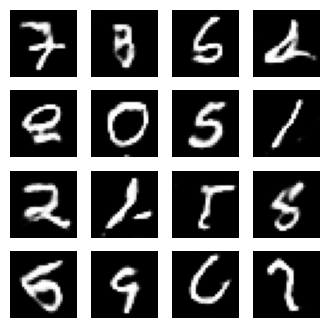

In [ ]:
#Обучение
train(train_dataset, epochs)

**Генеративно-состязательные сети - сверточный GAN на датасете CIFAR-10**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Гиперпараметры
img_width, img_height, img_channels = 32, 32, 3  # Размер изображения CIFAR-10
latent_dim = 100  # Размерность латентного пространства (шум)
batch_size = 128
epochs = 100
learning_rate = 0.0002
beta_1 = 0.5  # Параметр для оптимизатора Adam

In [ ]:
# Загрузка и предобработка данных (CIFAR-10)
(x_train, _), (_, _) = tf.keras.datasets.cifar10.load_data()

# Нормализация и изменение типа
x_train = x_train.astype('float32')
x_train = (x_train - 127.5) / 127.5  # Нормализация в диапазон [-1, 1]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Создание tf.data.Dataset для эффективной подачи данных
buffer_size = x_train.shape[0]
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(buffer_size).batch(batch_size)

In [ ]:
# Архитектура генератора
def build_generator():
    model = models.Sequential()

    # Начальный блок (Dense -> Reshape)
    model.add(layers.Dense(4*4*512, use_bias=False, input_shape=(latent_dim,))) # 4x4 для начала
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((4, 4, 512)))

    # Первый блок Conv2DTranspose
    model.add(layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', use_bias=False)) # 8x8
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Второй блок Conv2DTranspose
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))  # 16x16
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Третий блок Conv2DTranspose
    model.add(layers.Conv2DTranspose(img_channels, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))  # 32x32, tanh для [-1, 1]

    return model

In [ ]:
# Архитектура дискриминатора
def build_discriminator():
    model = models.Sequential()

    # Первый сверточный слой
    model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same',
                            input_shape=(img_width, img_height, img_channels)))
    model.add(layers.LeakyReLU(alpha=0.2)) # LeakyReLU с наклоном
    model.add(layers.Dropout(0.3))

    # Второй сверточный слой
    model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    # Третий сверточный слой
    model.add(layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    # Flatten и выходной слой
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
# Определение моделей
generator = build_generator()
discriminator = build_discriminator()

# Оптимизаторы
generator_optimizer = optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1)
discriminator_optimizer = optimizers.Adam(learning_rate=learning_rate, beta_1=beta_1)

# Функции потерь
cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
# Функции для обучения
@tf.function  # Декоратор для повышения производительности
def train_step(images):
    noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss

In [ ]:
# Обучение
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
        print(f"Epoch {epoch+1}, gen loss: {gen_loss}, disc loss: {disc_loss}")

        # Генерация и сохранение примеров изображений каждые несколько эпох (для мониторинга)
        if (epoch + 1) % 5 == 0:
            generate_and_save_images(generator,
                                     epoch + 1,
                                     tf.random.normal([16, latent_dim])) # 16 примеров

In [ ]:
# Генерация и сохранение изображений
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        img = (predictions[i] * 0.5 + 0.5)  # Денормализация [-1, 1] -> [0, 1]
        plt.imshow(img)
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

Epoch 1, gen loss: 0.7470234036445618, disc loss: 1.486441969871521
Epoch 2, gen loss: 0.7476829886436462, disc loss: 1.405043125152588
Epoch 3, gen loss: 0.6989158987998962, disc loss: 1.3311197757720947
Epoch 4, gen loss: 0.7165731191635132, disc loss: 1.3135344982147217
Epoch 5, gen loss: 0.9076561331748962, disc loss: 1.0825376510620117


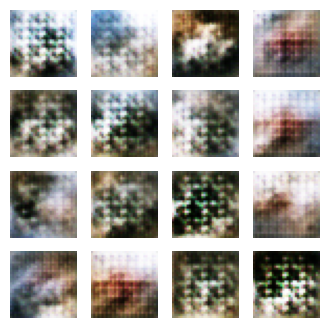

Epoch 6, gen loss: 0.9093562364578247, disc loss: 1.39234459400177
Epoch 7, gen loss: 0.8547852635383606, disc loss: 1.3200981616973877
Epoch 8, gen loss: 1.1404095888137817, disc loss: 0.8960468769073486
Epoch 9, gen loss: 1.0900605916976929, disc loss: 1.0359786748886108
Epoch 10, gen loss: 0.8746578693389893, disc loss: 1.2330546379089355


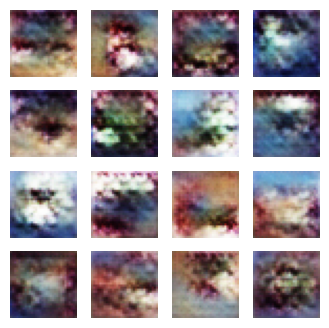

Epoch 11, gen loss: 1.3544230461120605, disc loss: 0.8932743072509766
Epoch 12, gen loss: 1.1276713609695435, disc loss: 1.0954906940460205
Epoch 13, gen loss: 1.414823055267334, disc loss: 1.0703169107437134
Epoch 14, gen loss: 1.0921616554260254, disc loss: 0.8411402106285095
Epoch 15, gen loss: 1.5311764478683472, disc loss: 1.0214451551437378


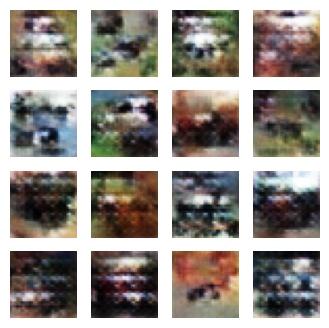

Epoch 16, gen loss: 2.0961227416992188, disc loss: 1.0619152784347534
Epoch 17, gen loss: 2.017594575881958, disc loss: 1.0758272409439087
Epoch 18, gen loss: 1.367431640625, disc loss: 0.9952665567398071
Epoch 19, gen loss: 1.4593877792358398, disc loss: 0.8790255188941956
Epoch 20, gen loss: 1.2767891883850098, disc loss: 0.8168898820877075


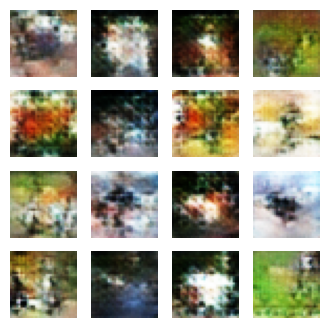

Epoch 21, gen loss: 1.1656794548034668, disc loss: 0.8700457811355591
Epoch 22, gen loss: 1.0458241701126099, disc loss: 1.01091730594635
Epoch 23, gen loss: 1.3827868700027466, disc loss: 1.009765863418579
Epoch 24, gen loss: 1.217381477355957, disc loss: 1.3248199224472046
Epoch 25, gen loss: 1.3438763618469238, disc loss: 0.8755857348442078


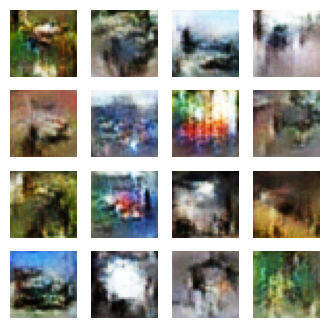

Epoch 26, gen loss: 1.1115835905075073, disc loss: 0.97820645570755
Epoch 27, gen loss: 1.1116085052490234, disc loss: 1.0467920303344727
Epoch 28, gen loss: 1.231116533279419, disc loss: 1.035539150238037
Epoch 29, gen loss: 1.139229416847229, disc loss: 0.9036754965782166
Epoch 30, gen loss: 1.0790669918060303, disc loss: 1.0762875080108643


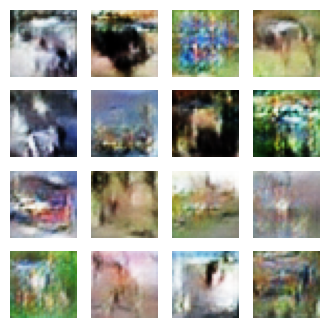

Epoch 31, gen loss: 1.2219581604003906, disc loss: 0.9961445331573486
Epoch 32, gen loss: 1.2384098768234253, disc loss: 0.8962811231613159
Epoch 33, gen loss: 1.0576756000518799, disc loss: 0.8756493330001831
Epoch 34, gen loss: 1.215837001800537, disc loss: 0.9976429343223572
Epoch 35, gen loss: 1.0886332988739014, disc loss: 1.0766528844833374


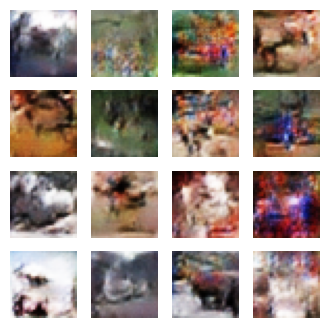

Epoch 36, gen loss: 1.4177379608154297, disc loss: 0.9454421997070312
Epoch 37, gen loss: 1.252349853515625, disc loss: 1.089296579360962
Epoch 38, gen loss: 1.3187708854675293, disc loss: 0.9199360609054565
Epoch 39, gen loss: 1.3732917308807373, disc loss: 0.7731698751449585
Epoch 40, gen loss: 1.1667121648788452, disc loss: 0.9089440107345581


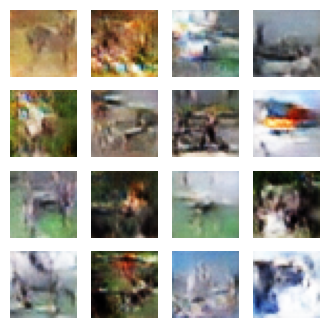

Epoch 41, gen loss: 1.2678142786026, disc loss: 1.2719426155090332
Epoch 42, gen loss: 1.2516233921051025, disc loss: 0.9300907850265503
Epoch 43, gen loss: 1.1230560541152954, disc loss: 1.1183878183364868
Epoch 44, gen loss: 1.2584631443023682, disc loss: 0.9938713312149048
Epoch 45, gen loss: 1.3326079845428467, disc loss: 0.9345384836196899


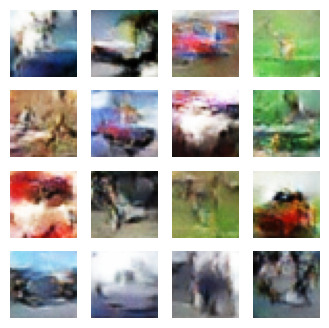

Epoch 46, gen loss: 1.1684811115264893, disc loss: 0.9865481853485107
Epoch 47, gen loss: 1.3958033323287964, disc loss: 1.0982699394226074
Epoch 48, gen loss: 1.1754883527755737, disc loss: 0.9426208734512329
Epoch 49, gen loss: 1.1070046424865723, disc loss: 1.024897813796997
Epoch 50, gen loss: 1.1025007963180542, disc loss: 1.0109816789627075


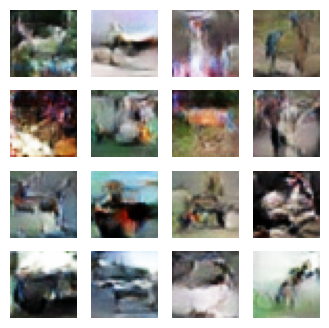

Epoch 51, gen loss: 0.7329154014587402, disc loss: 1.2473690509796143
Epoch 52, gen loss: 1.236339807510376, disc loss: 0.9623702764511108
Epoch 53, gen loss: 1.2425248622894287, disc loss: 0.9663239121437073
Epoch 54, gen loss: 1.1614103317260742, disc loss: 1.053905963897705
Epoch 55, gen loss: 1.1835012435913086, disc loss: 1.0050381422042847


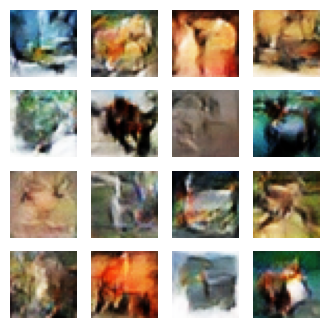

Epoch 56, gen loss: 1.1364309787750244, disc loss: 0.9427651762962341
Epoch 57, gen loss: 1.55949068069458, disc loss: 0.8497843146324158
Epoch 58, gen loss: 1.2633674144744873, disc loss: 0.9388838410377502
Epoch 59, gen loss: 1.1564663648605347, disc loss: 0.9866920709609985
Epoch 60, gen loss: 1.3523130416870117, disc loss: 0.8816114664077759


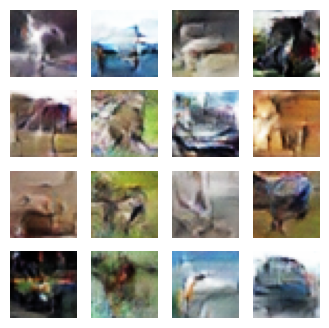

Epoch 61, gen loss: 1.0449670553207397, disc loss: 1.2074296474456787
Epoch 62, gen loss: 1.0925514698028564, disc loss: 1.0586891174316406
Epoch 63, gen loss: 1.189234972000122, disc loss: 1.0112192630767822
Epoch 64, gen loss: 1.2196983098983765, disc loss: 1.0454556941986084
Epoch 65, gen loss: 1.0856552124023438, disc loss: 1.145253300666809


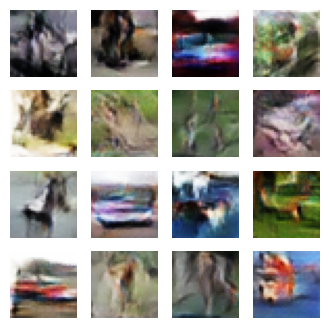

Epoch 66, gen loss: 1.2940165996551514, disc loss: 0.9739795923233032
Epoch 67, gen loss: 0.9809436798095703, disc loss: 1.1212047338485718
Epoch 68, gen loss: 1.3067690134048462, disc loss: 1.2582435607910156
Epoch 69, gen loss: 1.0853391885757446, disc loss: 1.1641013622283936
Epoch 70, gen loss: 1.0898706912994385, disc loss: 0.9471765756607056


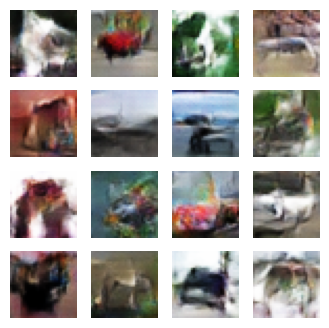

Epoch 71, gen loss: 1.1795250177383423, disc loss: 0.9877433180809021
Epoch 72, gen loss: 1.1192296743392944, disc loss: 0.9921697378158569
Epoch 73, gen loss: 1.1160330772399902, disc loss: 0.9275569915771484
Epoch 74, gen loss: 1.0188161134719849, disc loss: 1.02778959274292
Epoch 75, gen loss: 0.8681756854057312, disc loss: 1.165604591369629


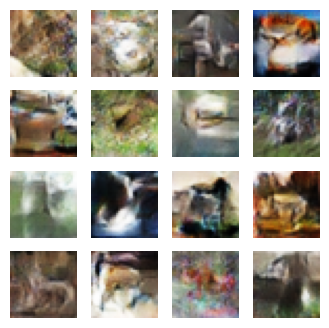

Epoch 76, gen loss: 1.2164297103881836, disc loss: 1.003279209136963
Epoch 77, gen loss: 1.205905795097351, disc loss: 1.055599570274353
Epoch 78, gen loss: 1.2427945137023926, disc loss: 0.9954938888549805
Epoch 79, gen loss: 0.9108842611312866, disc loss: 1.04123854637146
Epoch 80, gen loss: 1.1052151918411255, disc loss: 1.008697509765625


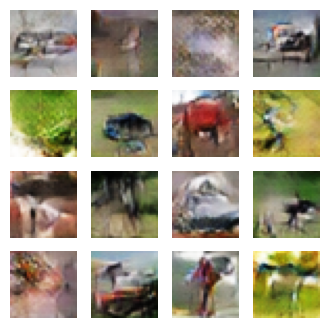

Epoch 81, gen loss: 1.1294302940368652, disc loss: 1.0015034675598145
Epoch 82, gen loss: 1.030604600906372, disc loss: 0.9841195940971375
Epoch 83, gen loss: 1.138098955154419, disc loss: 0.9214056730270386
Epoch 84, gen loss: 1.224194049835205, disc loss: 1.137429118156433
Epoch 85, gen loss: 1.132319450378418, disc loss: 0.9934350848197937


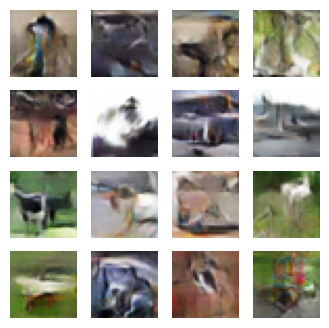

Epoch 86, gen loss: 1.2450792789459229, disc loss: 0.9870631694793701
Epoch 87, gen loss: 0.9431114196777344, disc loss: 1.1080344915390015
Epoch 88, gen loss: 1.1230123043060303, disc loss: 0.956739068031311
Epoch 89, gen loss: 1.2329094409942627, disc loss: 0.9554874300956726
Epoch 90, gen loss: 1.0945415496826172, disc loss: 1.1405295133590698


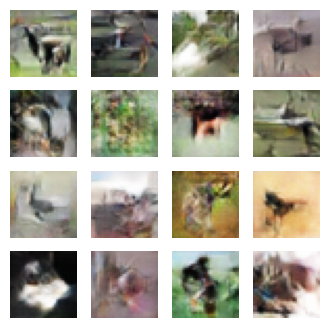

Epoch 91, gen loss: 0.843115508556366, disc loss: 1.2910380363464355
Epoch 92, gen loss: 1.1315332651138306, disc loss: 1.0134062767028809
Epoch 93, gen loss: 1.0635554790496826, disc loss: 1.0543909072875977
Epoch 94, gen loss: 1.1600618362426758, disc loss: 1.12992262840271
Epoch 95, gen loss: 1.2588015794754028, disc loss: 1.06451416015625


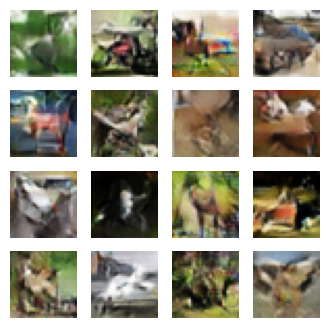

Epoch 96, gen loss: 1.4691073894500732, disc loss: 0.9808695912361145
Epoch 97, gen loss: 1.2581982612609863, disc loss: 0.8807138204574585
Epoch 98, gen loss: 1.4600316286087036, disc loss: 1.0057604312896729
Epoch 99, gen loss: 0.9722089171409607, disc loss: 1.2599265575408936
Epoch 100, gen loss: 1.0093977451324463, disc loss: 1.2473442554473877


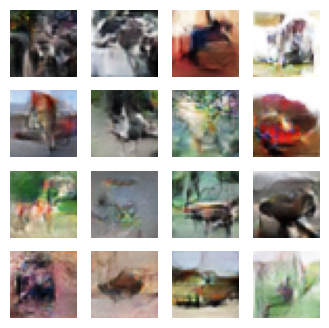

In [ ]:
# Обучение
train(train_dataset, epochs)

Самостоятельная работа:

In [ ]:
# Проведите эксперименты с архитектурами изученных нейронных сетей:
#- напишите код для генерации единичного случайного шума и подачи его
#на вход генератора сверточного GAN

#- добавьте комбинации слоев или уберите;


#- поэкспериментируйте с гиперпараметрами;


#- добейтесь более высокого уровня качества генерации
